In [88]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_excel('Case_Dados.xlsx')
df.head()

,id_itens,data_compra,status_id,from_iata,to_iata,tipo_viagem,data_ida,data_volta,valor_passagem,milhas_usadas,adultos,criancas
0,1,2019-08-01,1,GIG,MCO,Ida e volta,2019-08-04 22:05:00,2019-09-09 19:25:00,3329.78,0,1,0
1,2,2019-08-02,2,GIG,MIA,Ida e volta,2019-08-04 22:05:00,2019-08-18 19:00:00,2677.56,0,1,0
2,3,2019-08-02,2,GIG,SCL,Somente ida,2019-08-05 10:55:00,NaN,1812.35,0,3,0
3,4,2019-08-02,1,GIG,SCL,Somente ida,2019-08-05 10:55:00,NaN,1812.35,0,3,0
4,5,2019-08-03,2,IOS,GIG,Somente ida,2019-08-05 15:50:00,NaN,646.27,0,1,0


In [90]:
df.describe()

,id_itens,status_id,valor_passagem,milhas_usadas,adultos,criancas
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,1.51,2481.02,45758.78,1.41,0.07
std,577.49,0.74,2835.47,69597.13,0.72,0.33
min,1.00,1.00,0.00,0.00,1.00,0.00
25%,500.75,1.00,1000.28,0.00,1.00,0.00
50%,1000.50,1.00,1673.67,23650.00,1.00,0.00
75%,1500.25,2.00,2975.08,57600.00,2.00,0.00
max,2000.00,5.00,63876.97,636000.00,7.00,3.00


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_itens        2000 non-null   int64  
 1   data_compra     2000 non-null   object 
 2   status_id       2000 non-null   int64  
 3   from_iata       2000 non-null   object 
 4   to_iata         2000 non-null   object 
 5   tipo_viagem     2000 non-null   object 
 6   data_ida        2000 non-null   object 
 7   data_volta      856 non-null    object 
 8   valor_passagem  2000 non-null   float64
 9   milhas_usadas   2000 non-null   int64  
 10  adultos         2000 non-null   int64  
 11  criancas        2000 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 187.6+ KB


In [92]:
# transformando datas para o formato datetime
df['data_compra'] = pd.to_datetime(df['data_compra'])
df['data_ida'] = pd.to_datetime(df['data_ida'])
df['data_volta'] = pd.to_datetime(df['data_volta'])

In [93]:
# excluindo a coluna 'id_itens' por ser desnecessaria
df.drop('id_itens', axis = 1, inplace = True)

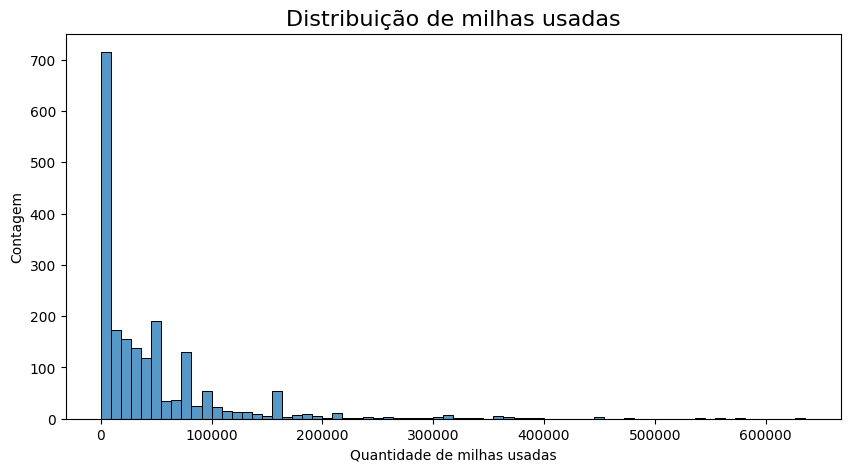

In [94]:
# vendo distribuição da variavel 'milhas_usadas'
plt.figure(figsize = (10,5))
sns.histplot(df, x = 'milhas_usadas')
plt.title('Distribuição de milhas usadas', fontsize = 16)
plt.ylabel('Contagem')
plt.xlabel('Quantidade de milhas usadas');

In [95]:
# conferindo a quantidade de milhas que estão zeradas
df.milhas_usadas.value_counts()

0         698
45500      94
79000      91
158000     49
23400      47
         ... 
34400       1
45200       1
22500       1
125000      1
163800      1
Name: milhas_usadas, Length: 386, dtype: int64

In [96]:
# numero total de linhas e colunas
df.shape

(2000, 11)

In [97]:
print('O numero de pessoas que usaram milhas é:', 2000-698)
print('O numero de pessoas que usaram milhas é: 698')

O numero de pessoas que usaram milhas é: 1302
O numero de pessoas que usaram milhas é: 698


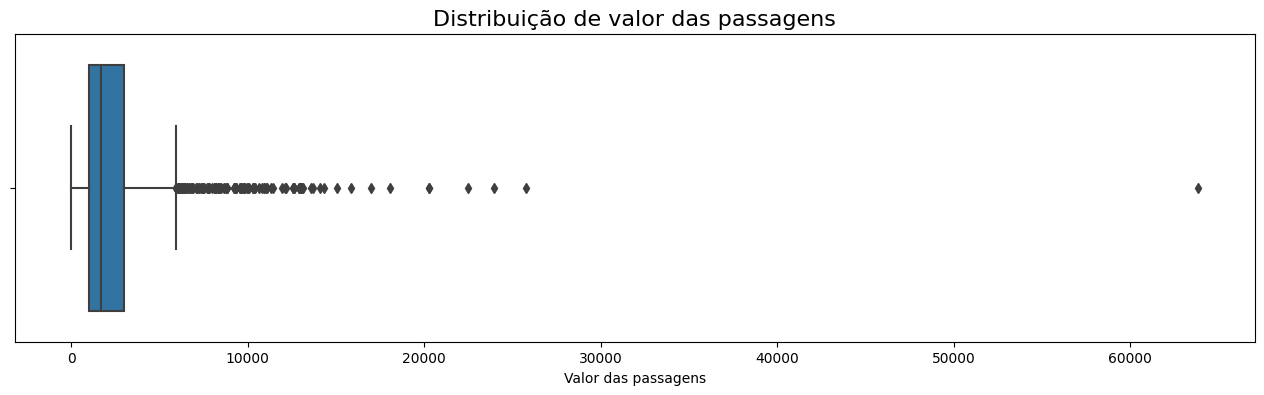

In [98]:
# conferindo a presensa de outliers na variavel 'valor_passagem'
plt.figure(figsize=(16,4))
sns.boxplot(df, x='valor_passagem')
plt.title('Distribuição de valor das passagens', fontsize = 16)
plt.xlabel('Valor das passagens');

In [99]:
# substituindo outlier pela mediana
df.loc[df['valor_passagem']>60000, 'valor_passagem'] = df['valor_passagem'].median()

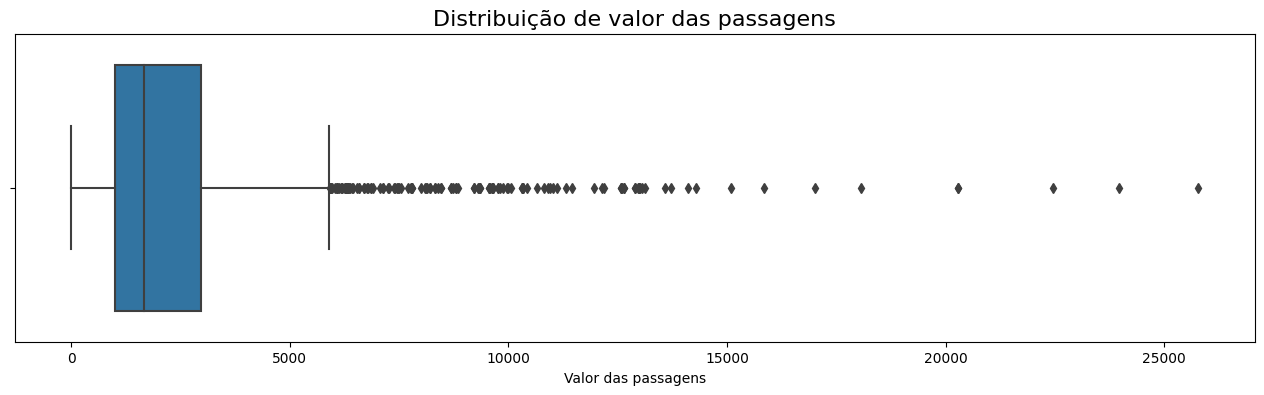

In [100]:
# conferindo nova distribuição sem os outliers
plt.figure(figsize=(16,4))
sns.boxplot(df, x='valor_passagem')
plt.title('Distribuição de valor das passagens', fontsize = 16)
plt.xlabel('Valor das passagens');

In [101]:
# nova media do valor das passagens apos tratamento de outliers
df.valor_passagem.mean()

2449.9223420791586

In [102]:
df.describe()

,status_id,valor_passagem,milhas_usadas,adultos,criancas
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1.51,2449.92,45758.78,1.41,0.07
std,0.74,2480.64,69597.13,0.72,0.33
min,1.00,0.00,0.00,1.00,0.00
25%,1.00,1000.28,0.00,1.00,0.00
50%,1.00,1673.66,23650.00,1.00,0.00
75%,2.00,2968.11,57600.00,2.00,0.00
max,5.00,25787.36,636000.00,7.00,3.00


*Mesmo que ainda tenham alguns outliers, chegamos com essa correção a um valor da média mais realista e plausivel para um trabalho futuro*

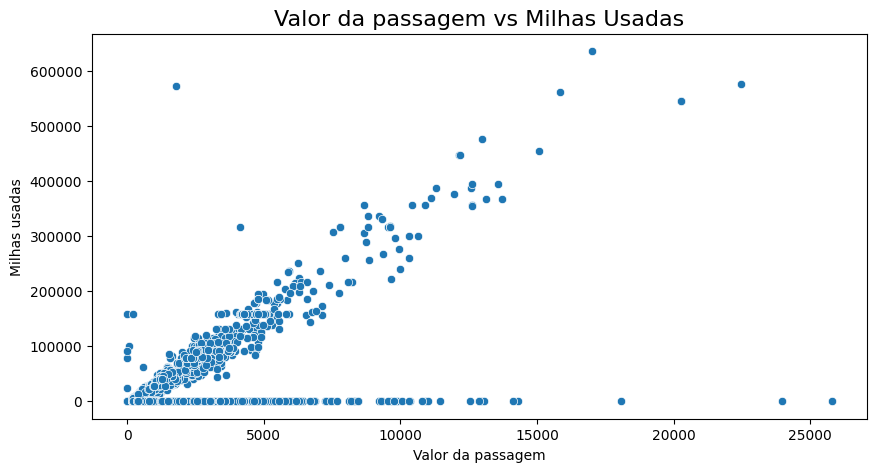

In [103]:
# Conferindo se há correlação entre valor das passagens e milhas usadas
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='valor_passagem', y='milhas_usadas')
plt.title('Valor da passagem vs Milhas Usadas', fontsize=16)
plt.xlabel('Valor da passagem')
plt.ylabel('Milhas usadas');

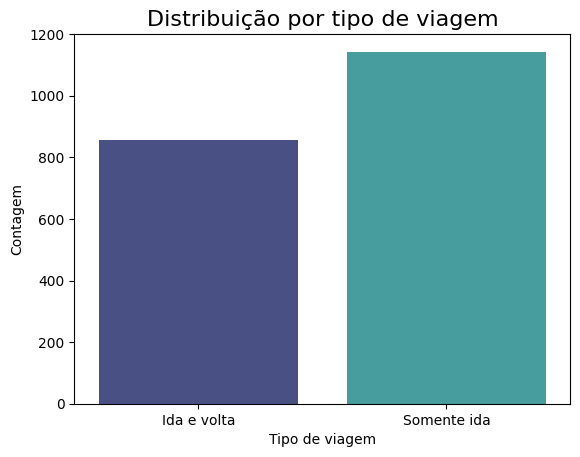

In [104]:
# vendo distribuição de tipo_viagem
sns.countplot(df, x='tipo_viagem', palette = 'mako')
plt.title('Distribuição por tipo de viagem', fontsize = 16)
plt.xlabel('Tipo de viagem')
plt.ylabel('Contagem');

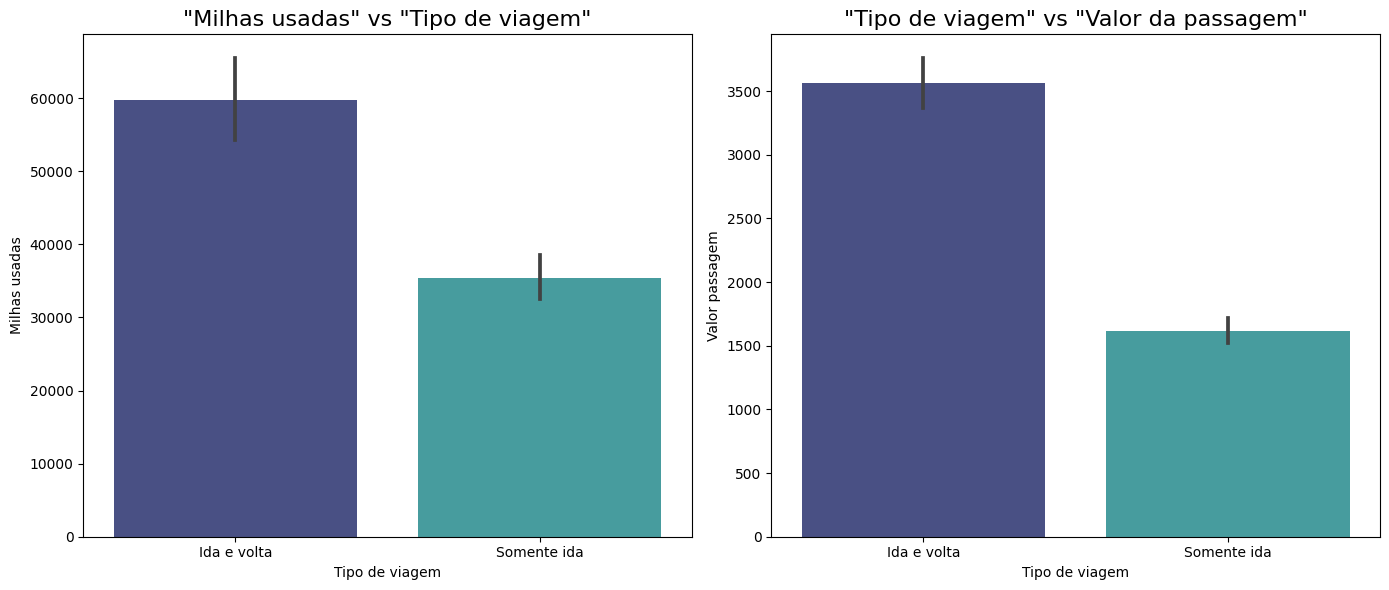

In [105]:
# comprativo das variaveis 'milhas_usadas', 'tipo_viagem' e 'valor_viagem'
fig, ax = plt.subplots(1,2, figsize = (14,6))
sns.barplot(df, x='tipo_viagem',y='milhas_usadas', palette = 'mako', ax = ax[0])
ax[0].set_title('"Milhas usadas" vs "Tipo de viagem"', fontsize = 16)
ax[0].set_xlabel('Tipo de viagem')
ax[0].set_ylabel('Milhas usadas')

sns.barplot(df, x='tipo_viagem',y='valor_passagem', palette = 'mako', ax = ax[1])
ax[1].set_title('"Tipo de viagem" vs "Valor da passagem"', fontsize = 16)
ax[1].set_xlabel('Tipo de viagem')
ax[1].set_ylabel('Valor passagem')

plt.tight_layout()

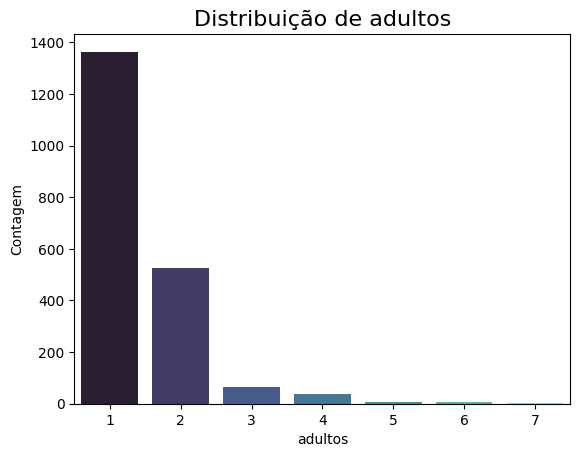

In [106]:
# vendo distribuição de adultos
sns.countplot(df, x='adultos', palette = 'mako')
plt.title('Distribuição de adultos', fontsize=16)
plt.ylabel('Contagem');

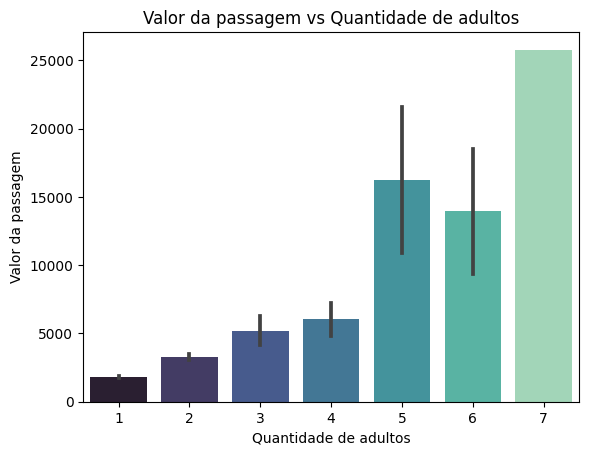

In [107]:
# vendo a relação entre numero de adultos e valor da passagem
sns.barplot(df, x='adultos', y='valor_passagem', palette = 'mako')
plt.title('Valor da passagem vs Quantidade de adultos')
plt.xlabel('Quantidade de adultos')
plt.ylabel('Valor da passagem');

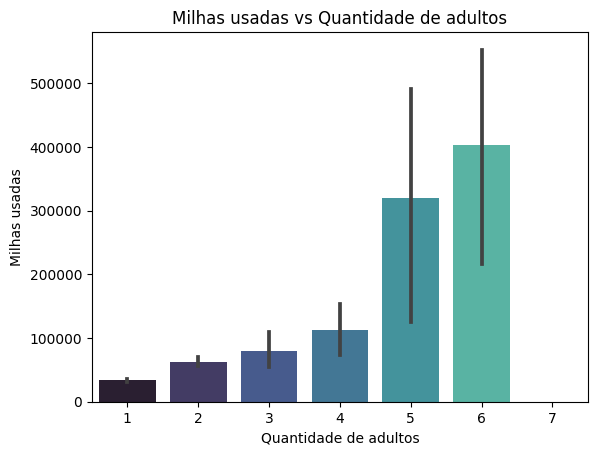

In [108]:
# vendo a relação entre milhas usadas e quantidade de adultos
sns.barplot(df, x='adultos', y='milhas_usadas', palette = 'mako')
plt.title('Milhas usadas vs Quantidade de adultos')
plt.xlabel('Quantidade de adultos')
plt.ylabel('Milhas usadas');

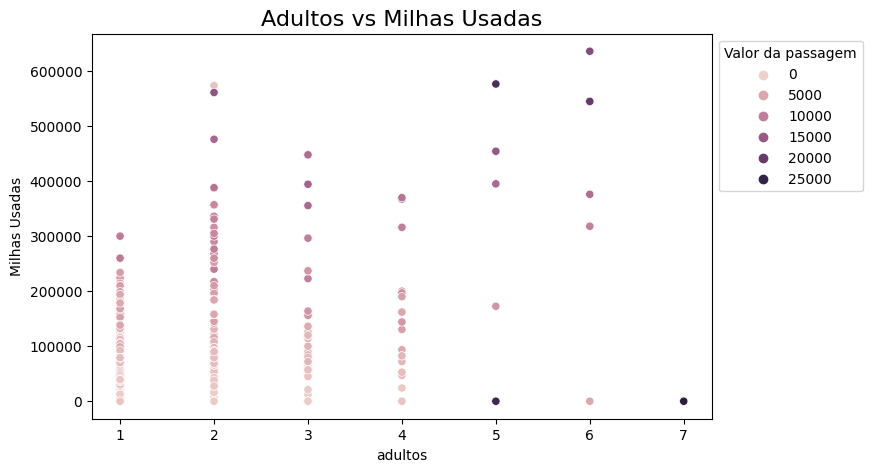

In [109]:
# vendo a dispersão do numero de adultos vs milhas usadas vs valor da passagem
plt.figure(figsize=(8,5))
sns.scatterplot(df, x='adultos', y='milhas_usadas', hue='valor_passagem')
plt.title('Adultos vs Milhas Usadas', fontsize=16)
plt.xlabel('adultos')
plt.ylabel('Milhas Usadas')
plt.legend(title='Valor da passagem',loc='best',bbox_to_anchor=(1, 1));

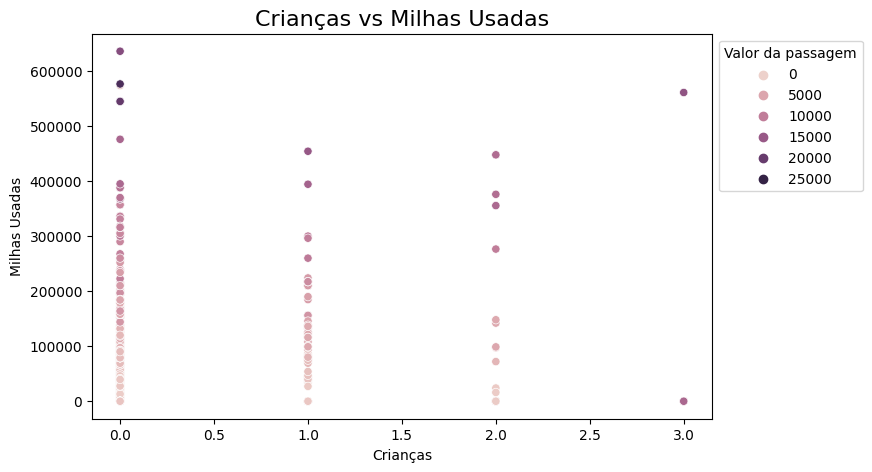

In [110]:
# vendo a dispersão do numero de crianças vs milhas usadas vs valor da passagem
plt.figure(figsize=(8,5))
sns.scatterplot(df, x='criancas', y='milhas_usadas', hue='valor_passagem')
plt.title('Crianças vs Milhas Usadas', fontsize=16)
plt.xlabel('Crianças')
plt.ylabel('Milhas Usadas')
plt.legend(title='Valor da passagem',loc='best',bbox_to_anchor=(1, 1));

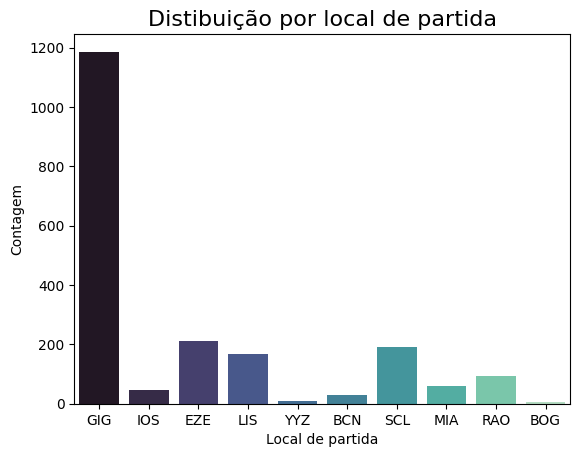

In [111]:
# vendo distribuição de local de partida
sns.countplot(df, x='from_iata', palette = 'mako')
plt.title('Distibuição por local de partida', fontsize=16)
plt.xlabel('Local de partida')
plt.ylabel('Contagem');

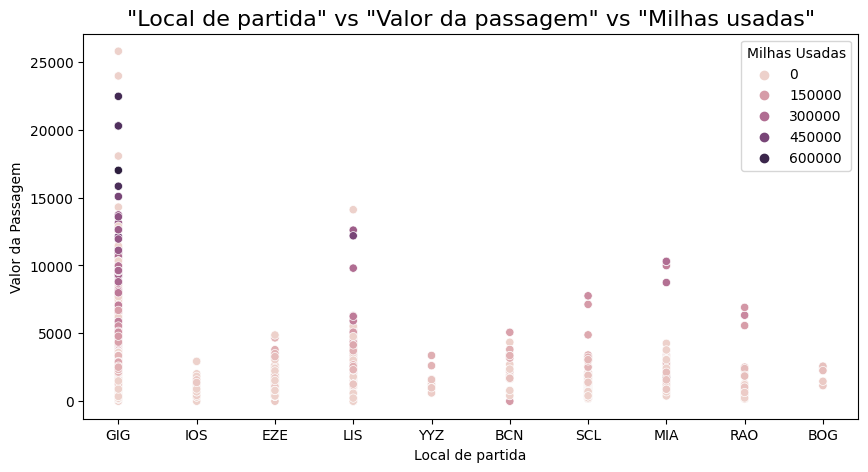

In [112]:
# vendo a distribuiçao e relaçao entre "Local de partida" vs "Valor da passagem" vs "Milhas usadas
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='from_iata', y='valor_passagem', hue='milhas_usadas')
plt.title('"Local de partida" vs "Valor da passagem" vs "Milhas usadas"', fontsize=16)
plt.xlabel('Local de partida')
plt.ylabel('Valor da Passagem')
plt.legend(title='Milhas Usadas', loc='upper right',bbox_to_anchor=(1, 1));

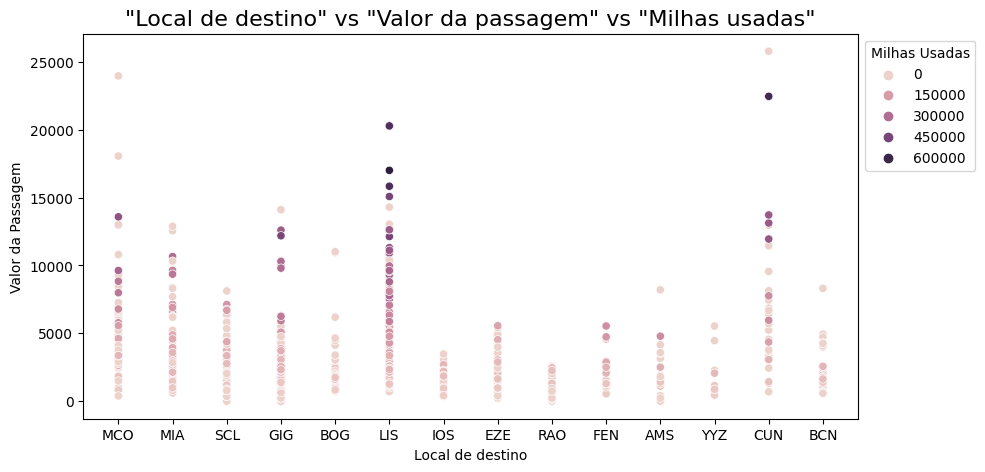

In [113]:
# vendo a disribuição e relação entre "Local de destino" vs "Valor da passagem" vs "Milhas usadas"
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='to_iata', y='valor_passagem', hue='milhas_usadas')
plt.title('"Local de destino" vs "Valor da passagem" vs "Milhas usadas"', fontsize=16)
plt.xlabel('Local de destino')
plt.ylabel('Valor da Passagem')
plt.legend(title='Milhas Usadas',loc='best',bbox_to_anchor=(1, 1));

In [114]:
# comparando Valor da passagem com milhas usadas por aeroporto
df.groupby('from_iata')['valor_passagem', 'milhas_usadas'].agg(['mean', 'median', 'max'])

valor_passagem                  milhas_usadas                 
                    mean  median      max          mean   median     max
from_iata                                                               
BCN              2276.32 1868.45  5078.38      57370.97 45500.00  158000
BOG              1983.22 2258.51  2582.06      41220.00 46000.00   55000
EZE              1302.29 1091.16  4879.08      17859.95 16150.00   97200
GIG              3038.89 2334.41 25787.36      54215.16 28100.00  636000
IOS              1114.09  970.64  2936.61      16611.52 16000.00   47000
LIS              2582.94 1868.46 14111.25      69511.83 53000.00  447750
MIA              2460.93 1721.55 10304.97      60994.46 40000.00  573600
RAO               882.06  600.37  6912.85      15629.95     0.00  210000
SCL              1104.22  777.02  7765.95      18216.89 11700.00  196800
YYZ              1523.92 1228.26  3371.64      43800.00 36000.00  100000

# Análisando correlação

In [115]:
# analisando a existencia de mais alugma correlação
df.corr()

,status_id,valor_passagem,milhas_usadas,adultos,criancas
status_id,1.00,0.08,0.11,0.05,0.02
valor_passagem,0.08,1.00,0.60,0.54,0.33
milhas_usadas,0.11,0.60,1.00,0.36,0.16
adultos,0.05,0.54,0.36,1.00,0.22
criancas,0.02,0.33,0.16,0.22,1.00


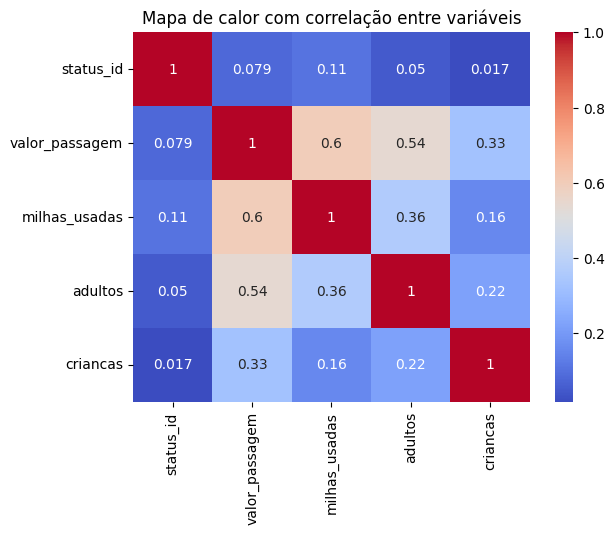

In [116]:
# analisando a existencia de mais alguma correlação atraves do grafico de calor
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Mapa de calor com correlação entre variáveis');

In [117]:
# analise da variavel status
df.groupby('status_id').sum()

,valor_passagem,milhas_usadas,adultos,criancas
status_id,,,,
1,2688891.13,45369975,1640,78
2,1723941.79,36145728,924,55
3,416614.26,9048650,208,8
4,42699.29,210000,18,1
5,27698.21,743200,25,2


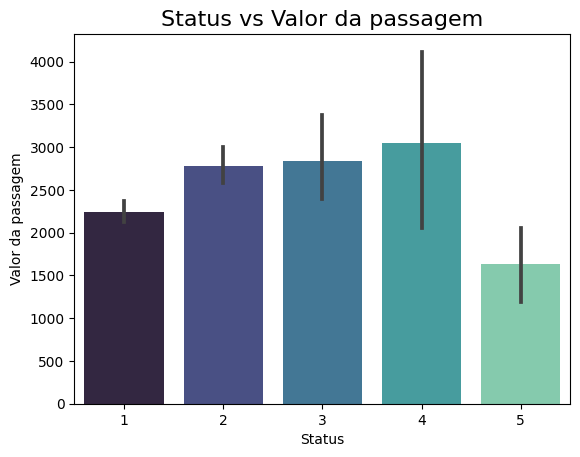

In [118]:
# comparando status x valor da passagem
sns.barplot(df, x='status_id', y='valor_passagem', palette='mako')
plt.title('Status vs Valor da passagem', fontsize = 16)
plt.xlabel('Status')
plt.ylabel('Valor da passagem');

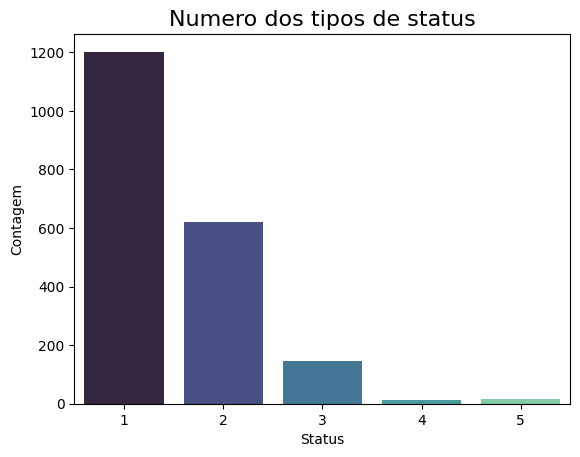

In [119]:
# grafico com numero de status
sns.countplot(df, x='status_id', palette='mako')
plt.title('Numero dos tipos de status', fontsize = 16)
plt.xlabel('Status')
plt.ylabel('Contagem');